In [1]:
# Import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import plotly.graph_objects as go
import numpy as np
import scipy.stats as stats

## 1. Pull the appropriate data using the API of CDC.

For this project, our objective is to conduct an analysis concerning the disparities in average BMI across each state in the United States. We collected the data using an API provided by the Centers for Disease Control and Prevention (CDC), which serves as the national public health agency of the United States.

The data source is the BRFSS Table of Overweight and Obesity (BMI) available at https://data.cdc.gov/Behavioral-Risk-Factors/BRFSS-Table-of-Overweight-and-Obesity-BMI-/fqb7-mgjf.

In [2]:
#  Defines the URL of the JSON dataset hosted on the CDC website, the parameter $limit=58538 restricts the number of data entries returned from the dataset to 58,538 records.
url = ('https://data.cdc.gov/resource/fqb7-mgjf.json?$limit=58538')
print(url)

# The requests.get() function sends an HTTP GET request to the server and receives the response.
response = requests.get(url)  # Make a GET request to the URL

# Print status code (and associated text)
# The response.status_code gives the HTTP status code (e.g., 200 for success, 404 for not found, etc.), and response.reason gives a short description of the status code.
print(f"Request returned {response.status_code} : '{response.reason}'")

# The response.json() function extracts and converts the JSON data to a Python dictionary or list, depending on the JSON structure.
payload = response.json()  # Parse `response.text` into JSON

https://data.cdc.gov/resource/fqb7-mgjf.json?$limit=58538
Request returned 200 : 'OK'


In [3]:
# Convert JSON data to DataFrame
df = pd.DataFrame(payload)

# Display the DataFrame
display(df.head())

,geolocation,break_out,data_value,breakoutid,confidence_limit_high,responseid,breakoutcategoryid,question,datasource,data_value_unit,...,topicid,break_out_category,topic,class,locationdesc,response,confidence_limit_low,sample_size,data_value_footnote,data_value_footnote_symbol
0,"{'latitude': '32.84057112200048', 'human_addre...",Overall,1.76,BO1,2.35,RESP042,CAT1,Weight classification by Body Mass Index (BMI)...,BRFSS,%,...,TOPIC09,Overall,BMI Categories,Overweight and Obesity (BMI),Alabama,Underweight (BMI 12.0-18.4),1.17,71,NaN,NaN
1,"{'latitude': '32.84057112200048', 'human_addre...",Overall,26.44,BO1,28.22,RESP041,CAT1,Weight classification by Body Mass Index (BMI)...,BRFSS,%,...,TOPIC09,Overall,BMI Categories,Overweight and Obesity (BMI),Alabama,Normal Weight (BMI 18.5-24.9),24.66,1112,NaN,NaN
2,"{'latitude': '32.84057112200048', 'human_addre...",Overall,31.94,BO1,33.8,RESP040,CAT1,Weight classification by Body Mass Index (BMI)...,BRFSS,%,...,TOPIC09,Overall,BMI Categories,Overweight and Obesity (BMI),Alabama,Overweight (BMI 25.0-29.9),30.08,1412,NaN,NaN
3,"{'latitude': '32.84057112200048', 'human_addre...",Overall,39.86,BO1,41.82,RESP039,CAT1,Weight classification by Body Mass Index (BMI)...,BRFSS,%,...,TOPIC09,Overall,BMI Categories,Overweight and Obesity (BMI),Alabama,Obese (BMI 30.0 - 99.8),37.9,1652,NaN,NaN
4,"{'latitude': '32.84057112200048', 'human_addre...",Male,NaN,SEX1,NaN,RESP042,CAT2,Weight classification by Body Mass Index (BMI)...,BRFSS,%,...,TOPIC09,Gender,BMI Categories,Overweight and Obesity (BMI),Alabama,Underweight (BMI 12.0-18.4),NaN,18,Prevalence estimate not available if the unwei...,*


## 2. Exploratory Data Analysis


As per usual practice, before delving into the in-depth analysis, we will perform an Exploratory Data Analysis (EDA) to clean the data and gain initial insights about its characteristics. EDA allows us to understand the dataset's structure, identify missing or erroneous data, and explore patterns and trends that could guide further analysis. Through this process, we aim to prepare the data for meaningful exploration and extract valuable information to inform

To kick off the Exploratory Data Analysis (EDA), we begin by using the `info()` function.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58538 entries, 0 to 58537
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   geolocation                 58450 non-null  object
 1   break_out                   58538 non-null  object
 2   data_value                  46912 non-null  object
 3   breakoutid                  58538 non-null  object
 4   confidence_limit_high       46824 non-null  object
 5   responseid                  58538 non-null  object
 6   breakoutcategoryid          58538 non-null  object
 7   question                    58538 non-null  object
 8   datasource                  58538 non-null  object
 9   data_value_unit             58538 non-null  object
 10  locationid                  58538 non-null  object
 11  display_order               58522 non-null  object
 12  year                        58538 non-null  object
 13  questionid                  58538 non-null  ob

### Description of the dataset column

In this section, we provide an overview of the column definitions, enabling us to comprehend the variables in the dataset and correctly interpret the data by understanding the meaning and representation of each column.

*   `geolocation`: Location code to be used for Geocoding
*   `break_out`: Stratification value
*   `data_value`: Data Value, such as 14.7 or no value if footnote symbol is present
*   `breakoutid`: Identifier for the stratification
*   `confidence_limit_high`: High Confidence Limit
*   `responseid`: Response identifier
*   `breakoutcategoryid`: Identifier for the stratification Group
*   `question`: Question
*   `datasource`: Data Source
*   `data_value_unit`: The unit, such as "%" for percentage
*   `locationid`: Column location number value corresponding to geographic location like state
*   `display_order`: Display order
*   `year`: Year
*   `questionid`: Question Identifier
*   `locationabbr`: State Abbreviation
*   `classid`: Class Identifier
*   `data_value_type`: The data value type, such as age-adjusted prevalence or crude prevalence
*   `topicid`: Topic Identifier
*   `break_out_category`: Breakout_Category Stratification grouping
*   `topic`: Topic Description
*   `class`: 	Class Description
*   `locationdesc`: State Name
*   `response`: Evaluated Response
*   `confidence_limit_low`: Low Confidence Limit
*   `sample_size`: Sample size used to calculate the data value
*   `confidence_limit_low`: Low Confidence Limit
*   `data_value_footnote_symbol`: Footnote Symbol


In [5]:
# Checking whether the data has missing or null values
df.isna().sum()

geolocation                      88
break_out                         0
data_value                    11626
breakoutid                        0
confidence_limit_high         11714
responseid                        0
breakoutcategoryid                0
question                          0
datasource                        0
data_value_unit                   0
locationid                        0
display_order                    16
year                              0
questionid                        0
locationabbr                      0
classid                           0
data_value_type                   0
topicid                           0
break_out_category                0
topic                             0
class                             0
locationdesc                      0
response                          0
confidence_limit_low          11714
sample_size                       0
data_value_footnote           46904
data_value_footnote_symbol    46904
dtype: int64

During the data cleaning process, we observed that several columns contain null values. However, as these columns are not crucial for the analysis, we have decided not to fill the null values in all of them. Instead, we will focus on filling the `data_value` column, as it is essential for our analysis.

Since we know that the `data_value` column represents the BMI (Body Mass Index) score, it should ideally be of numeric data type. However, as we observed that the data types in the `data_value` column are currently labeled as objects, we will need to convert them to numeric data type before proceeding with filling the null values. By doing so, we can ensure that the column contains numerical values, allowing us to perform meaningful calculations and analyses related to BMI scores.

In [6]:
df['data_value'] = df['data_value'].apply(pd.to_numeric)
print(df.dtypes)

geolocation                    object
break_out                      object
data_value                    float64
breakoutid                     object
confidence_limit_high          object
responseid                     object
breakoutcategoryid             object
question                       object
datasource                     object
data_value_unit                object
locationid                     object
display_order                  object
year                           object
questionid                     object
locationabbr                   object
classid                        object
data_value_type                object
topicid                        object
break_out_category             object
topic                          object
class                          object
locationdesc                   object
response                       object
confidence_limit_low           object
sample_size                    object
data_value_footnote            object
data_value_f

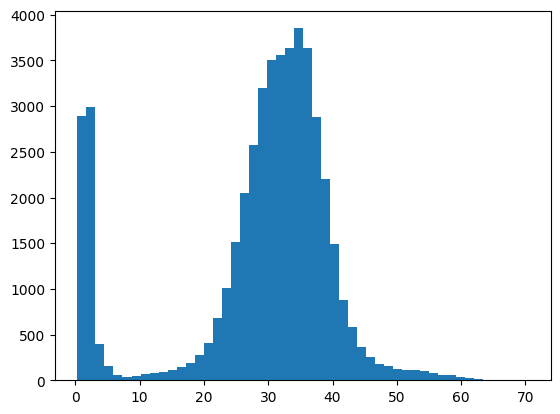

In [7]:
plt.hist(df['data_value'],bins=50)
plt.show()

As observed in the dataset, there are several entries indicating BMI values that are less than 11. However, according to [The Biology of Human Starvation](https://www.ennonline.net/fex/15/limits#:~:text=In%20males%2C%20a%20BMI%20of,index%20variability%20(CV%2014%25) the lowest possible BMI is 11 for women and 12 for men. Since the dataset does not provide information about gender, we can consider BMI values less than 11 as either incorrect or missing inputs, treating them as null values. In the subsequent step, we will address these null values and perform data imputation to handle the erroneous or missing BMI entries effectively.

Before proceeding with filling the null values, we will first filter the data to include only BMI values greater than 11. By doing this, we can observe the distribution of BMI scores across the dataset and gain insights into the patterns and characteristics of the valid BMI values. This will help us determine the appropriate approach for filling the null values in the `data_value` column effectively and make informed decisions based on the observed distribution.

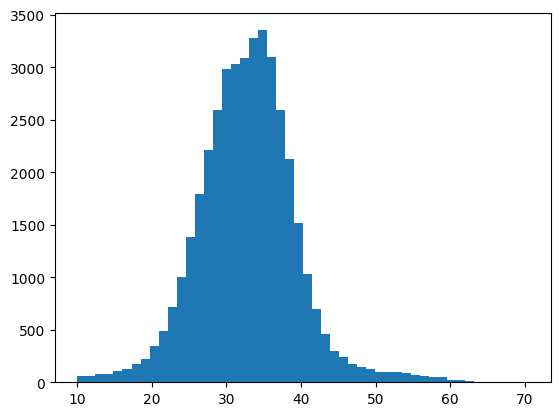

In [8]:
data_value = df[df['data_value'] > 10]

plt.hist(data_value['data_value'],bins=50)
plt.show()

Based on the observation that the filtered data follows a normal distribution, the appropriate approach for filling the null values in the `data_value` column is to use the mean of the available BMI scores. Filling the null values with the mean value ensures that the imputed values align with the overall distribution pattern, providing a reasonable estimate for the missing BMI data points. This method takes advantage of the data's normal distribution to make a sensible imputation that reflects the central tendency of the BMI scores in the dataset.

In [9]:
# We fill the null value with mean
df['data_value'] = df['data_value'].fillna(df['data_value'].mean())

# We handle BMI values below 11 as null values and proceed to impute them with the mean value.
df['data_value'] = [df.data_value.mean()if i<11 else i for i in df['data_value']]

Last, we utilize the `sort_values` function to verify that the dataset does not contain BMI values below 11, ensuring the lowest BMI score is within a biologically plausible range.

In [10]:
df['data_value'].sort_values()

48378    11.00
56002    11.00
43507    11.00
47790    11.00
46410    11.10
         ...  
23315    68.93
28665    68.97
31931    70.09
945      70.18
31743    70.46
Name: data_value, Length: 58538, dtype: float64

After making changes to the BMI data, the `response` column, which initially indicated a person's weight classification, might now be inaccurate due to the data modification. To address this, we will create a new column called `category` to categorize the weight classification of each individual based on the guidelines from [cdc.gov](https://www.cdc.gov/obesity/basics/adult-defining.html#:~:text=Adult%20Body%20Mass%20Index&text=If%20your%20BMI%20is%20less,falls%20within%20the%20obesity%20range.). This new column will provide an updated and accurate representation of the weight categories corresponding to the adjusted BMI values in the dataset.

Using cdc.gov as the parameter, we apply the appropriate weight classification to each individual's BMI value in the dataset and store the corresponding category in the newly created `category` column.

In [11]:
df['category'] = ['Underweight' if i <18.5 else 'Normal Range' if i>18.5 and i< 25 else 'Overweight' if i >= 25 and i<30 else 'Obesity' for i in df['data_value']]

Next, we want to determine the number of individuals in each BMI category. To achieve this, we utilize the `value_counts` function with the argument `normalize=True`, which will provide the percentage of individuals in each category. By using this method, we can easily see the percentage distribution of people in the "Obesity" category and other BMI categories across the entire dataset from the United States.

In [12]:
df['category'].value_counts(normalize=True)

Obesity         0.468328
Overweight      0.466364
Normal Range    0.054529
Underweight     0.010779
Name: category, dtype: float64

Based on the results, it is evident that both obesity and overweight categories account for 46% each, while the normal weight category constitutes only 5%, and underweight comprises 10%. Consequently, approximately 90% of all individuals are classified as at least overweight, with only 5% falling into the normal weight range, reflecting a relatively small percentage of individuals in the ideal or normal weight category.

## 3. Visualise a heatmap that shows the prevalence of BMI across all states.


For this task, we aim to create a choropleth map using `plotly.graph_objects` to visualize the prevalence of BMI across all states in the United States. The use of a choropleth map allows us to effectively represent the geographical variations in obesity prevalence and highlight the differences in BMI proportions across different states in the US.

To visualize the observation of similar BMI values across different locations in the United States, we can create a choropleth map using the dataset based on each location. By grouping the data by location and calculating the mean of the `data_value` (BMI) for each location (which we save as `df1`), we can identify small differences in average BMI levels represented by the varying shades of color on the map. The choropleth map will provide a visual representation of how BMI values compare across different regions in the United States, with deeper shades of color indicating slight variations in average BMI.


In [13]:
df1 = df.groupby(['locationabbr','locationdesc'])['data_value'].mean().reset_index()
df1.sort_values(by='data_value')

,locationabbr,locationdesc,data_value
40,PR,Puerto Rico,30.944961
26,MS,Mississippi,31.184258
50,VI,Virgin Islands,31.230599
12,HI,Hawaii,31.322181
54,WV,West Virginia,31.326381
11,GU,Guam,31.339718
14,ID,Idaho,31.339757
55,WY,Wyoming,31.341808
27,MT,Montana,31.348547
51,VT,Vermont,31.366787


Based on `df1`, it is evident that there is a similarity in the mean BMI values across various locations in America, averaging around 31 BMI. Using the CDC guidelines, a BMI of 31 falls within the category of obesity, suggesting that, on average, Americans have obesity. The results also indicate that the average BMI tends to be consistent across different states, reinforcing the finding that there is a similar amount of average BMI across the United States.

Next, we will generate a map using the defined DataFrame `df1` to visualize the data.

In [14]:
# Create a choropleth map using Plotly
fig = go.Figure(go.Choropleth(
    # List of location abbreviations (e.g., state codes)
    locations=df1['locationabbr'],
    # Use 'USA-states' location mode to represent U.S. states
    locationmode='USA-states',
    # The data to be plotted on the map (average BMI values)
    z=df1['data_value'],
    # The colorscale to use for the color mapping
    colorscale='Viridis_r',
    # Title for the colorbar representing the data values
    colorbar_title='Average BMI',
    # Define tick values for the colorbar
    colorbar=dict(tickvals=np.arange(30.7, 32, 0.1), ticks='outside'),
    # The text to be displayed on hover (e.g., location names)
    text=df1['locationdesc']
))
# Add map layout and title
fig.update_layout(
    title_text='Average BMI Across Different Locations in the United States',
    # Set the geographical scope to 'usa' to focus on the United States
    geo_scope='usa'
)

# Show the map
fig.show()

Based on the choropleth map, it is clear that states with higher average BMI values are depicted with deeper shades of purple. According to the dataset, Washington state has the highest average BMI of 31.694, while Mississippi has the lowest average BMI of 31.184. The color intensity on the map effectively visualizes the differences in BMI levels across different states, with darker colors indicating higher average BMI values and lighter colors representing lower values. This visualization provides valuable insights into the variations in obesity prevalence across different regions in the United States.

However, there is a notable discrepancy between the choropleth map and the dataset regarding Puerto Rico. Despite having complete data showing Puerto Rico's lowest average BMI of 30.944, the territory is not represented on the map. This discrepancy is not due to corrupt data but is likely because Puerto Rico is classified as an [unincorporated territory](https://en.wikipedia.org/wiki/Territories_of_the_United_States#:~:text=Puerto%20Rico%3A%20unincorporated%20territory%20since,1950%20(Public%20Law%20600)) indicating its control by the U.S. government while remaining separate from the mainland. As a result, the map might focus exclusively on the states and not include territories like Puerto Rico in its visualization.

## 4. Speculation of the results


It is indeed rare to find multiple nations with similar average BMI values, and this consistency across states in the United States might raise some interesting considerations. There could be several reasons for this similarity:

Data Curation: The dataset might have been carefully curated to ensure that the

*   Data Curation : The dataset might have been carefully curated to ensure that the average BMI values are representative of each state's population.
*   Limited Data: The data obtained from the API might be a partial representation of the actual data, focusing on specific states or regions, which could contribute to the observed similarity.
*   Regional Trends: There might be regional trends or lifestyle factors that influence BMI values, leading to similar averages across various states.
*   National Health Trends: It is also possible that the US, as a nation, exhibits consistent health and lifestyle patterns that contribute to the uniformity of average BMI values.

Further analysis and investigation would be required to understand the underlying reasons for the observed similarity in average BMI values across states in the United States. Additionally, cross-referencing the dataset with other reputable sources could help ensure the data's accuracy and representativeness.

## Acknowledgements and Recommendations

The dataset was obtained through an API from the Centers for Disease Control and Prevention (CDC), which serves as the national public health agency of the United States.

For future analysis, I suggest seeking alternative complete datasets to validate the consistency of results, especially considering the limited variation observed across states in this project. Furthermore, conducting a more comprehensive analysis to investigate the factors contributing to the differences between states would provide valuable insights.

---


## Data License
This data is licensed under [Creative Commons Attribution-Universal (CC0 1.0)](https://creativecommons.org/publicdomain/zero/1.0/). I hereby affirm that I do not possess any material nor monetary benefit by doing this project.

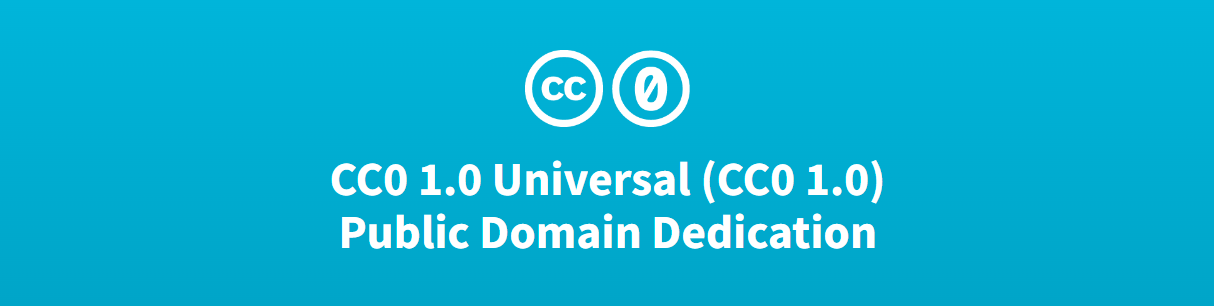